In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Supermart Grocery Sales - Retail Analytics Dataset.csv to Supermart Grocery Sales - Retail Analytics Dataset.csv


In [ ]:

df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [ ]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:

df.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4/17/2018,West,1034,0.28,165.44,Tamil Nadu


In [ ]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [ ]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB
None


In [ ]:
print(df.describe())

             Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000
25%    1000.000000     0.160000   180.022500
50%    1498.000000     0.230000   320.780000
75%    1994.750000     0.290000   525.627500
max    2500.000000     0.350000  1120.950000


In [ ]:
print(df.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [ ]:
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [ ]:

correlation = df.corr(numeric_only=True)
print(correlation['Profit'].sort_values(ascending=False))

Profit      1.000000
Sales       0.605349
Discount    0.000017
Name: Profit, dtype: float64


In [ ]:
df = df.drop(['Order ID', 'Customer Name', 'Order Date'], axis=1)

In [ ]:

df.head()

,Category,Sub Category,City,Region,Sales,Discount,Profit,State
0,Oil & Masala,Masalas,Vellore,North,1254,0.12,401.28,Tamil Nadu
1,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80,Tamil Nadu
2,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20,Tamil Nadu
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,0.25,89.60,Tamil Nadu
4,Food Grains,Organic Staples,Ooty,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
y = df['Profit']
X = df.drop('Profit', axis=1)

In [ ]:
categorical_cols = ['Category', 'Sub Category', 'City', 'Region', 'State']
numerical_cols = ['Sales', 'Discount']


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
categorical_transformer = OneHotEncoder(drop='first',
handle_unknown='ignore')
numerical_transformer = StandardScaler()

In [ ]:
preprocessor = ColumnTransformer([
    ('cat', categorical_transformer, categorical_cols),
    ('num', numerical_transformer, numerical_cols)
])

In [ ]:
model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)


model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)


from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

RMSE: 196.76119598698972
R² Score: 0.3518305010965048
RMSE: 38714.96824623058


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    xgb_available = False


y = df['Profit']
X = df.drop('Profit', axis=1)


categorical_cols = ['Category', 'Sub Category', 'City', 'Region', 'State']
numerical_cols = ['Sales', 'Discount']


categorical_transformer = OneHotEncoder(drop='first',
handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer([
    ('cat', categorical_transformer, categorical_cols),
    ('num', numerical_transformer, numerical_cols)
])

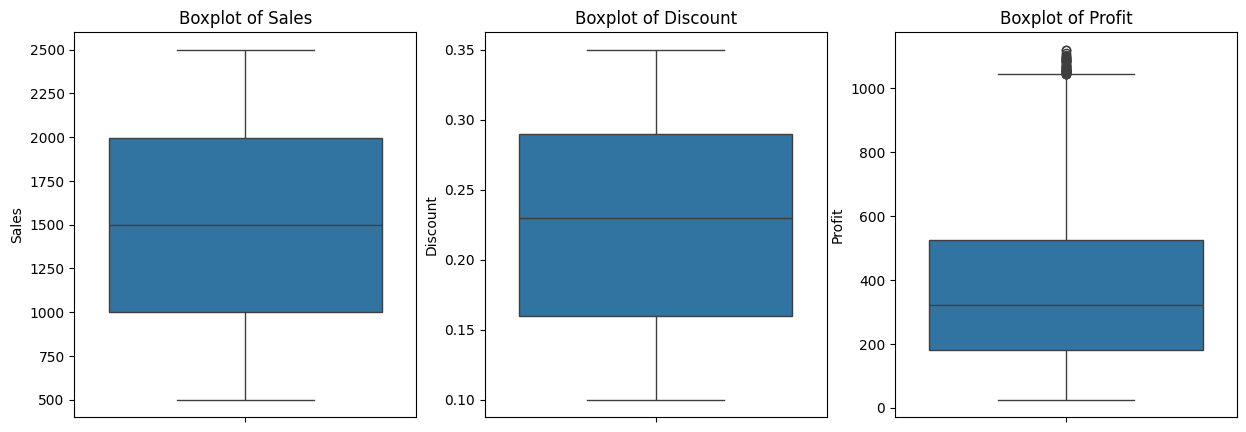

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_cols = ['Sales', 'Discount', 'Profit']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

final_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Category', 'Sub Category',
                                                   'City', 'Region', 'State']),
                                                 ('num', StandardScaler(),
                                                  ['Sales', 'Discount'])])),
                ('regressor', LinearRegression())])

In [ ]:
import numpy as np


df = df[df['Profit'] > 0]

df['Log_Profit'] = np.log(df['Profit'])


X = df.drop(['Profit', 'Log_Profit'], axis=1)
y = df['Log_Profit']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)


print(df['Profit'].dtype)
print(df['Profit'].describe())

float64
count    9994.000000
mean      374.937082
std       239.932881
min        25.250000
25%       180.022500
50%       320.780000
75%       525.627500
max      1120.950000
Name: Profit, dtype: float64


In [ ]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from category_encoders import TargetEncoder
import numpy as np


X = df.drop('Profit', axis=1)
y = df['Profit']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)


pipeline = Pipeline([
    ('encoder', TargetEncoder(cols=['Category', 'Sub Category', 'City', 'Region', 'State'])),
    ('model', LinearRegression())
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


print("✅ Using Pipeline")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

✅ Using Pipeline
R² Score: 0.8651678839579808
RMSE: 89.74119196478986


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
import gradio as gr


'Log_Profit'



X = df[['Category', 'Sub Category', 'City', 'Region', 'Sales', 'Discount', 'State']]
y = df['Log_Profit']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)


pipeline = Pipeline([
    ('encoder', TargetEncoder(cols=['Category', 'Sub Category', 'City', 'Region',
'State'])),
    ('model', LinearRegression())
])


pipeline.fit(X_train, y_train)


def predict_profit(Category, Sub_Category, City, Region, Sales, Discount,
State):
    input_df = pd.DataFrame({
        'Category': [Category],
        'Sub Category': [Sub_Category],
        'City': [City],
        'Region': [Region],
        'Sales': [Sales],
        'Discount': [Discount],
        'State': [State]
    })
    log_pred = pipeline.predict(input_df)[0]
    profit_pred = np.expm1(log_pred)
    return round(profit_pred, 2)


inputs = [
    gr.Dropdown(choices=df['Category'].unique().tolist(), label="Category"),
    gr.Dropdown(choices=df['Sub Category'].unique().tolist(), label="Sub Category"),
    gr.Dropdown(choices=df['City'].unique().tolist(), label="City"),
    gr.Dropdown(choices=df['Region'].unique().tolist(), label="Region"),
    gr.Number(label="Sales"),
    gr.Number(label="Discount"),
    gr.Dropdown(choices=df['State'].unique().tolist(), label="State"),
]

outputs = gr.Textbox(label="Predicted Profit")


app = gr.Interface(fn=predict_profit, inputs=inputs, outputs=outputs,
title="Profit Prediction")

app.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://71f6d6c7de0f27c2ac.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
